In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
bank = pd.read_csv('banknotes.csv')

In [5]:
bank.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [7]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Curtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [9]:
bank.isnull().sum()

Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64

##### Separate the input and output variables

In [18]:
#input
x = bank[['Variance','Skewness','Curtosis','Entropy']]

In [22]:
#output variable
y = bank['Class']

In [26]:
x.describe()

,Variance,Skewness,Curtosis,Entropy
count,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657
std,2.842763,5.869047,4.310030,2.101013
min,-7.042100,-13.773100,-5.286100,-8.548200
25%,-1.773000,-1.708200,-1.574975,-2.413450
50%,0.496180,2.319650,0.616630,-0.586650
75%,2.821475,6.814625,3.179250,0.394810
max,6.824800,12.951600,17.927400,2.449500


In [32]:
#Exploratory Data Analysis

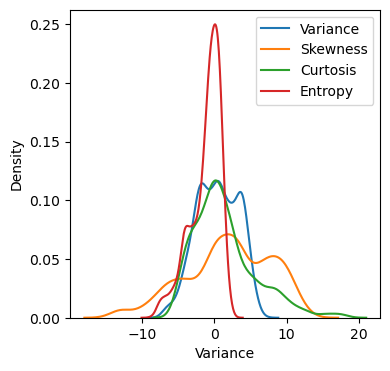

In [50]:
plt.figure(figsize=(4,4))
sns.kdeplot(x['Variance'], label='Variance')
sns.kdeplot(x['Skewness'], label='Skewness')
sns.kdeplot(x['Curtosis'], label='Curtosis')
sns.kdeplot(x['Entropy'], label='Entropy')
plt.legend();

In [52]:
np.unique(y)

array([0, 1], dtype=int64)

In [60]:
set(y)

{0, 1}

In [56]:
from collections import Counter
Counter(y)

Counter({0: 762, 1: 610})

In [58]:
y.value_counts()

Class
0    762
1    610
Name: count, dtype: int64

C:\Users\duasp\AppData\Local\Temp\ipykernel_9732\215970029.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='tab10');


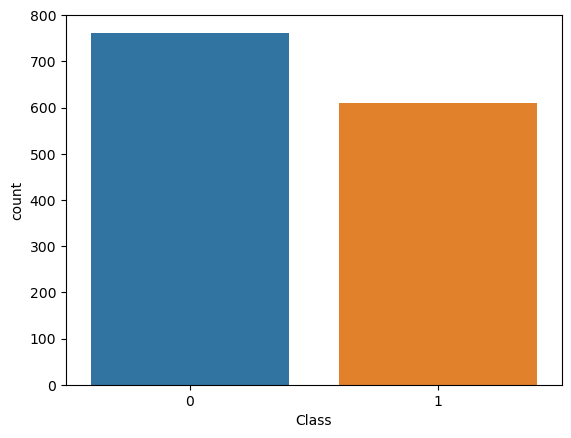

In [72]:
sns.countplot(x=y, palette='tab10');

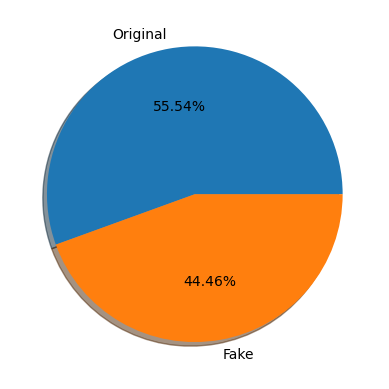

In [90]:
plt.pie(y.value_counts(), labels=['Original','Fake'], autopct='%.2f%%', shadow=True);

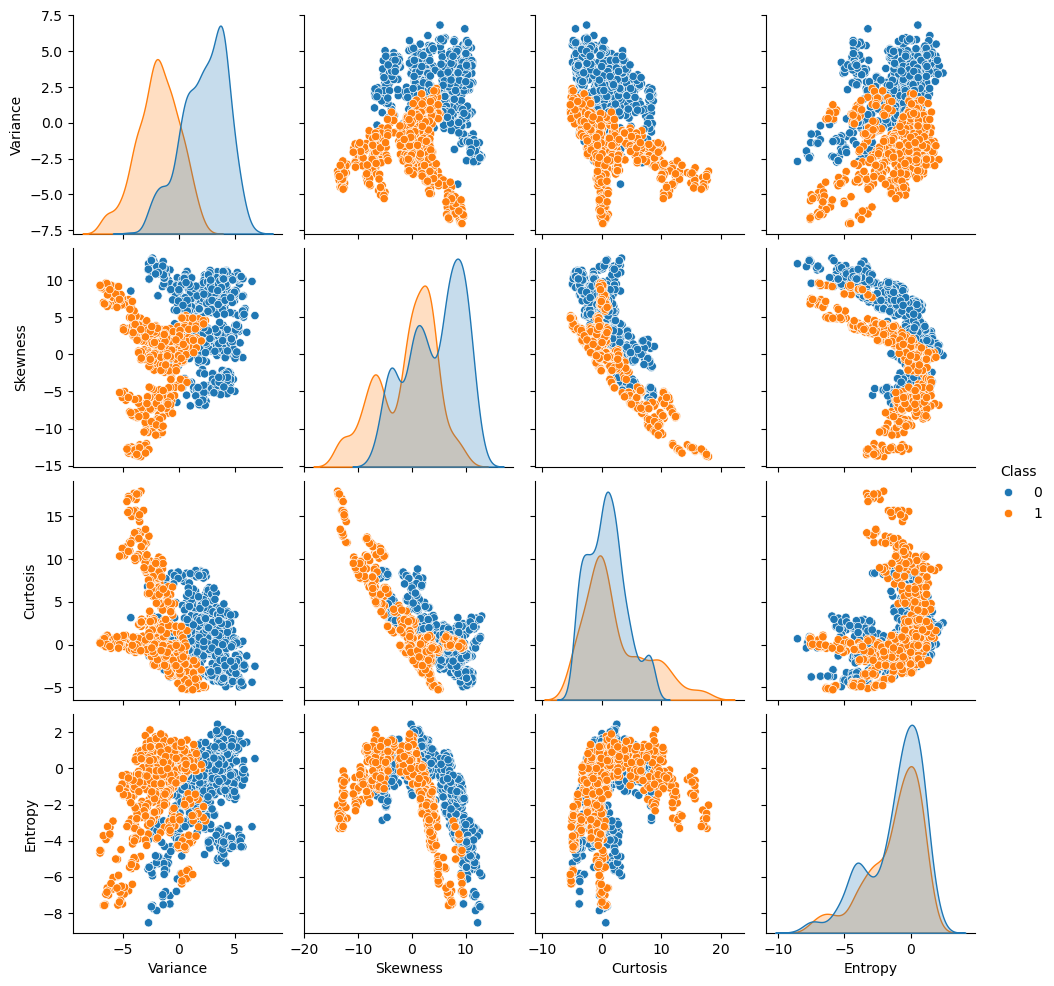

In [92]:
sns.pairplot(bank, hue='Class')

#### Cross Validation

In [96]:
from sklearn.model_selection import train_test_split

In [101]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [103]:
x_train.shape

(1029, 4)

In [105]:
x_test.shape

(343, 4)

In [107]:
x_train

,Variance,Skewness,Curtosis,Entropy
662,2.97360,8.794400,-3.635900,-1.375400
512,2.66480,10.754000,-3.399400,-4.168500
1193,-3.75730,-8.291600,10.303200,0.380590
682,3.73210,-3.884000,3.357700,-0.006049
1313,-1.50780,-7.319100,7.898100,1.228900
...,...,...,...,...
763,0.39012,-0.142790,-0.031994,0.350840
835,-0.94255,0.039307,-0.241920,0.315930
1216,0.60050,0.999450,-2.212600,0.097399
559,2.01650,-0.252460,5.170700,1.076300


In [113]:
##### Build the Decision Tree Model

In [115]:
from sklearn.tree import DecisionTreeClassifier

In [117]:
dt= DecisionTreeClassifier(random_state=0)

In [119]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

Plot the Tree

In [122]:
from sklearn.tree import plot_tree

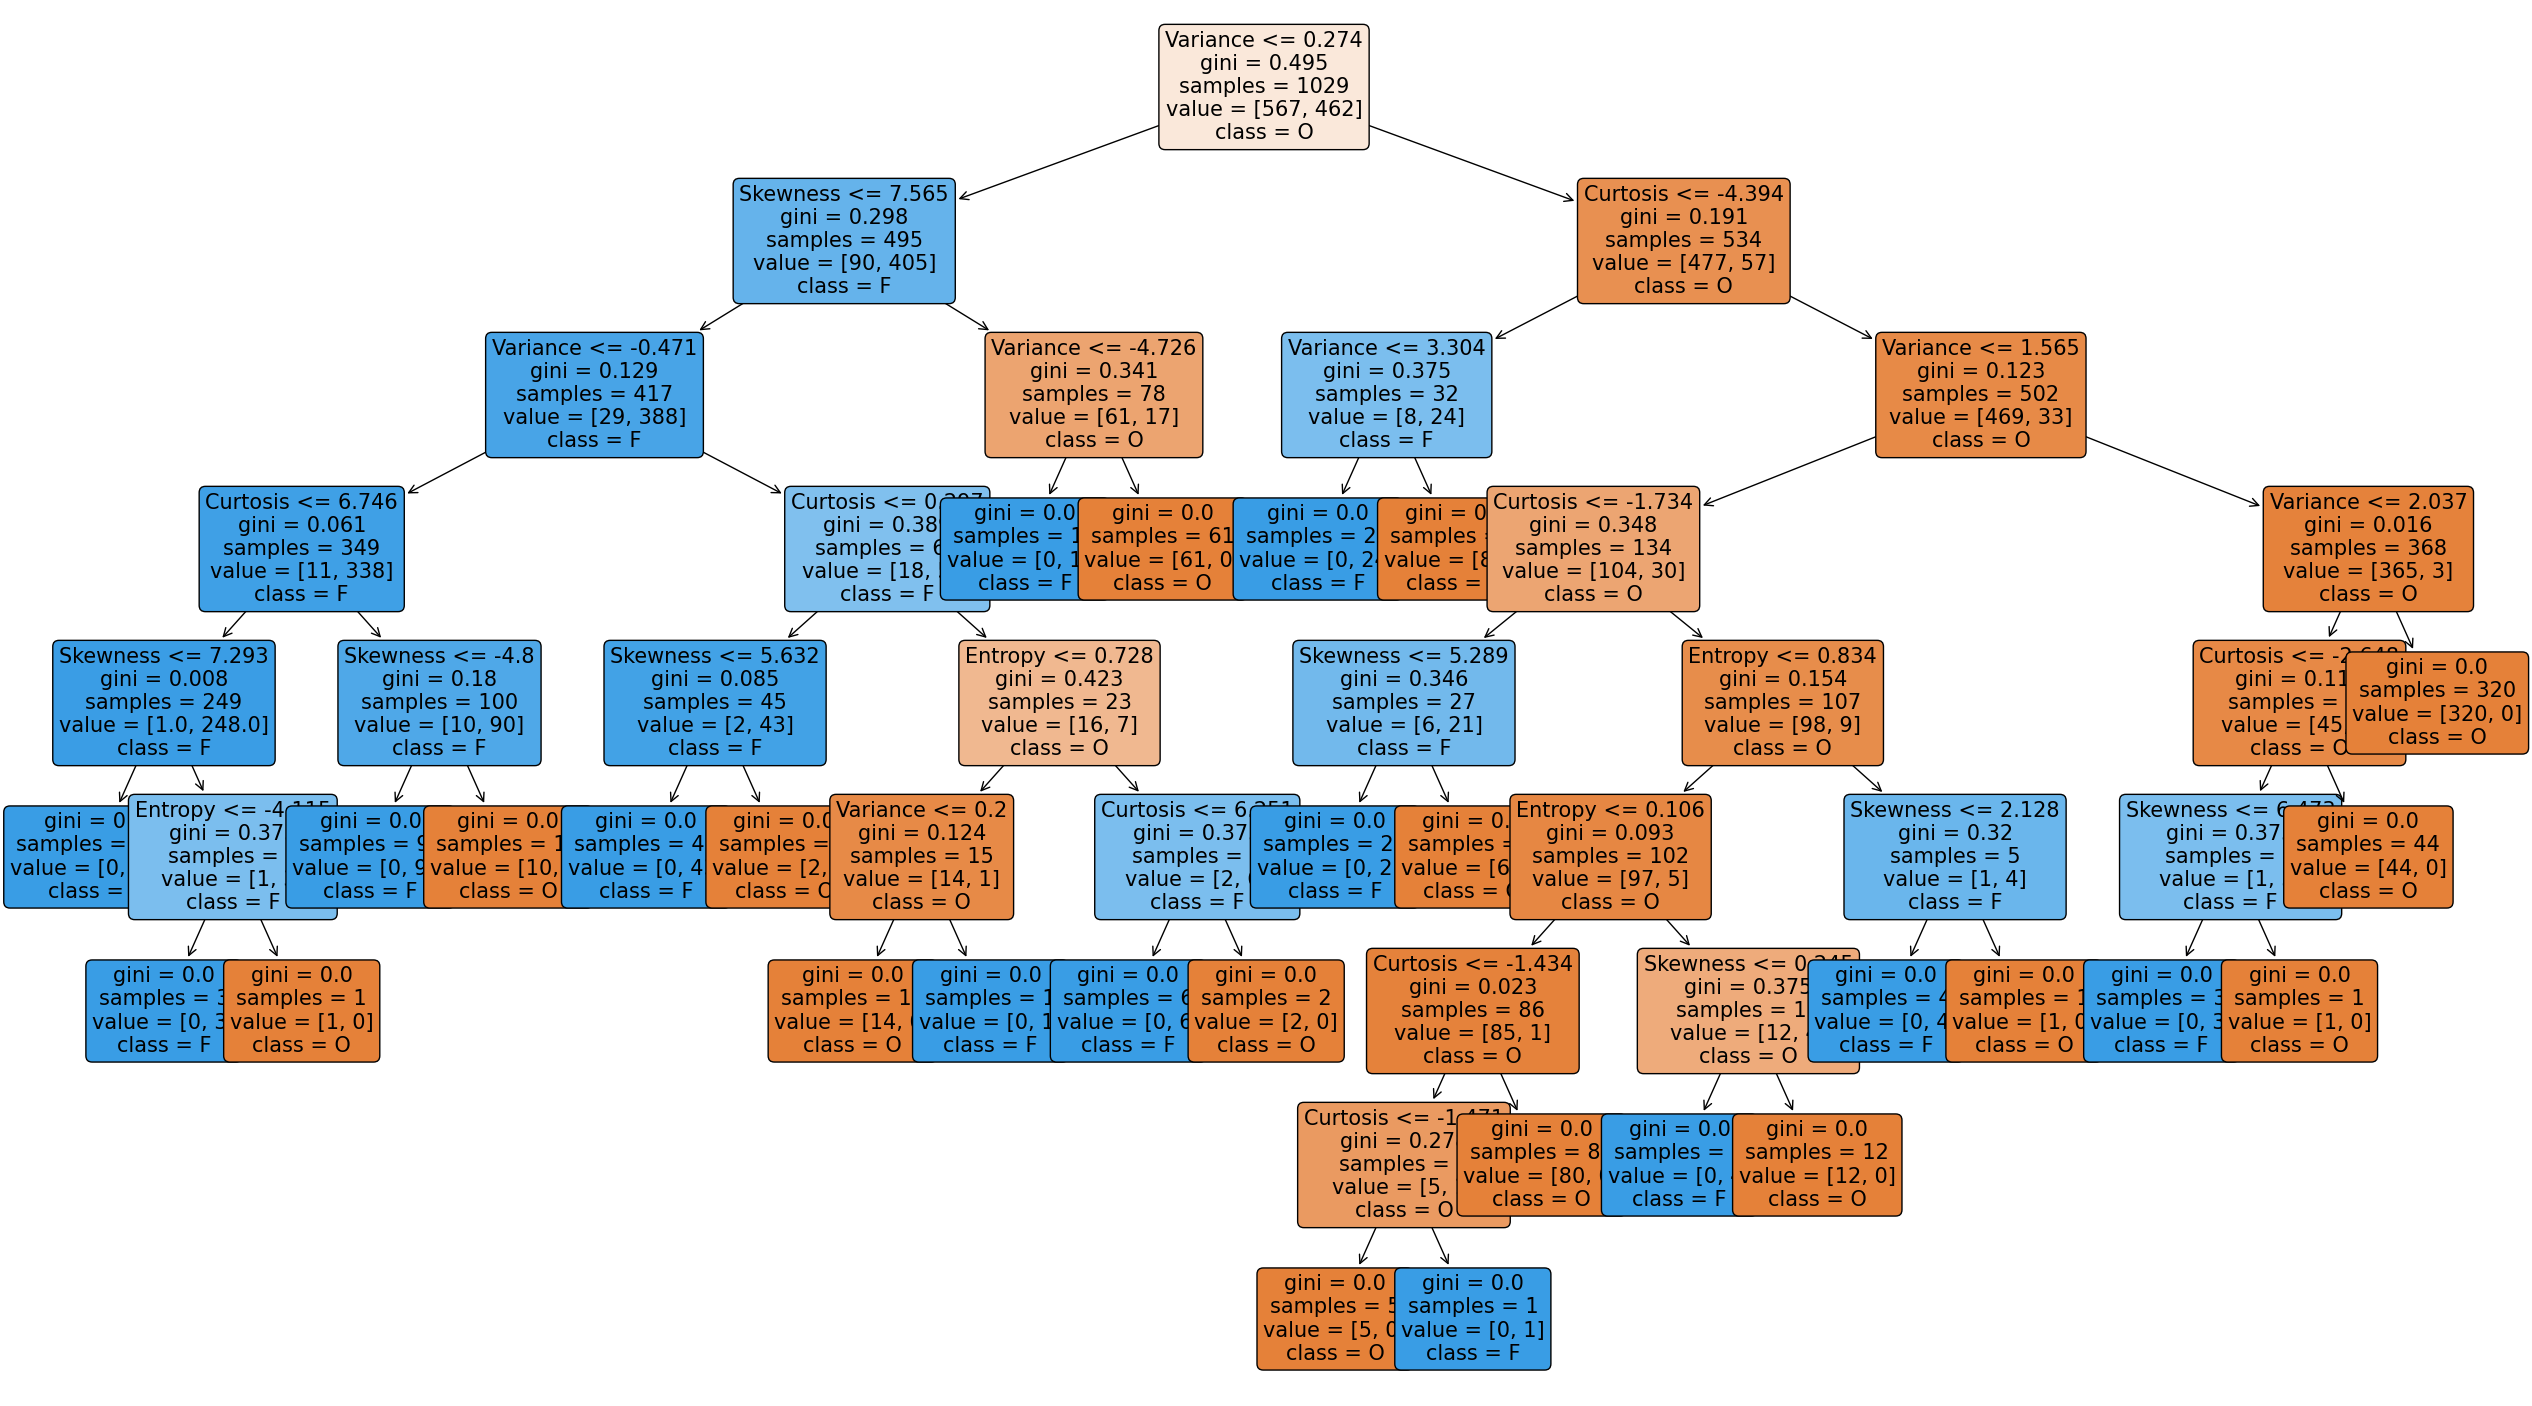

In [134]:
plt.figure(figsize=(32,18))
plot_tree(dt, fontsize=15, filled=True, rounded=True,class_names=['O','F'],
         feature_names=x.columns);

In [136]:
## Performance Evaluation

In [138]:
y_pred= dt.predict(x_test)

In [140]:
y_pred

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,

In [146]:
result = pd.DataFrame({
    'Actual': y_test,
    'Prediction':y_pred,
})

In [168]:
result

,Actual,Prediction
1023,1,1
642,0,0
1196,1,1
31,0,0
253,0,0
...,...,...
866,1,1
361,0,0
703,0,0
328,0,0


In [152]:
np.sum(result['Actual']==result['Prediction'])

336

In [154]:
np.sum(result['Actual']!=result['Prediction'])

7

In [156]:
np.sum(result['Actual']==result['Prediction'])/len(y_test)

0.9795918367346939

In [162]:
y_test.value_counts()

Class
0    195
1    148
Name: count, dtype: int64

In [178]:
sum(y_test[y_test ==0] == y_pred[y_test ==0])

191

In [180]:
sum(y_test[y_test ==1] == y_pred[y_test ==1])

145

In [182]:
from sklearn.metrics import ConfusionMatrixDisplay

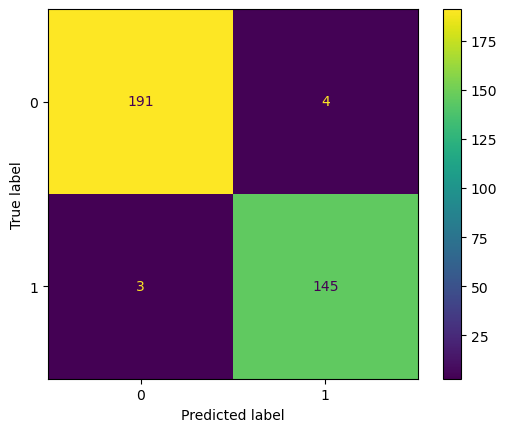

In [194]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [196]:
#Features Importances

In [198]:
dt.feature_importances_

array([0.62095248, 0.21106862, 0.14189251, 0.02608639])

<BarContainer object of 4 artists>

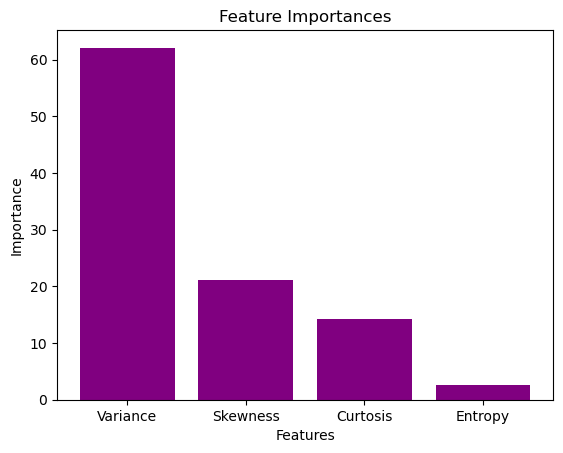

In [200]:
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.bar(x.columns, dt.feature_importances_ * 100, color= 'purple')

In [202]:
# prediction on unseen data

In [204]:
new = pd.DataFrame(data=[[3.73210, -3.884000, 3.357700,-0.006049],
                        [-3.75030, -13.45860,17.5932,-2.77710],
                        [-1.38870,-4.87730,6.4774,0.34179]],
                  columns=x.columns)

In [206]:
new

,Variance,Skewness,Curtosis,Entropy
0,3.7321,-3.8840,3.3577,-0.006049
1,-3.7503,-13.4586,17.5932,-2.777100
2,-1.3887,-4.8773,6.4774,0.341790


In [208]:
dt.predict(new)

array([0, 1, 1], dtype=int64)